In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from gc import collect as collect_garbage
from psutil import virtual_memory

In [2]:
%matplotlib widget

In [3]:
folder = "../../Deidentified-Raw-Waveforms/"
coldict = {
    "raw_waves_data_1a.csv": ["time", "257"], "raw_waves_data_1b.csv": ["time", "257", "258"], "raw_waves_data_1c.csv": ["time", "257", "258"], "raw_waves_data_1d.csv": ["time", "257", "258", "317"], 
    "raw_waves_data_1e.csv": ["time", "258"],

    "raw_waves_data_2a.csv": ["time", "257", "258"], "raw_waves_data_2b.csv": ["time", "258"], "raw_waves_data_2c.csv": ["time", "257"], "raw_waves_data_2d.csv": ["time", "257", "258"], 
    "raw_waves_data_2e.csv": ["time", "257", "258"],

    "raw_waves_data_3a.csv": ["time", "258"], "raw_waves_data_3b.csv": ["time", "258"], "raw_waves_data_3c.csv": ["time", "258"], "raw_waves_data_3d.csv": ["time", "258"], 
    "raw_waves_data_3e.csv": ["time", "257", "258", "317"],

    "raw_waves_data_4a.csv": ["time", "257", "258"], "raw_waves_data_4b.csv": ["time", "257", "258"], "raw_waves_data_4c.csv": ["time", "257"], "raw_waves_data_4d.csv": ["time", "257", "258"], 
    "raw_waves_data_4e.csv": ["time", "257", "258"],

    "raw_waves_data_5a.csv": ["time", "258"], "raw_waves_data_5b.csv": ["time", "258"], "raw_waves_data_5c.csv": ["time", "258"], "raw_waves_data_5d.csv": ["time", "258", "317"],
    "raw_waves_data_5e.csv": ["time", "258"],

    "raw_waves_data_6a.csv": ["time", "257", "258"], "raw_waves_data_6b.csv": ["time", "258"], "raw_waves_data_6c.csv": ["time", "258"], "raw_waves_data_6d.csv": ["time", "258"], "raw_waves_data_6e.csv": ["time", "258"],
    
    "raw_waves_data_7a.csv": ["time", "257", "258"], "raw_waves_data_7b.csv": ["time", "258"], "raw_waves_data_7c.csv": ["time", "258"], "raw_waves_data_7d.csv": ["time", "257", "258", "317"], 
    "raw_waves_data_7e.csv": ["time", "258"]
}

namedict = {
    "raw_waves_data_1a.csv": "1a", "raw_waves_data_1b.csv": "1b", "raw_waves_data_1c.csv": "1c", "raw_waves_data_1d.csv": "1d", "raw_waves_data_1e.csv": "1e",
    "raw_waves_data_2a.csv": "2a", "raw_waves_data_2b.csv": "2b", "raw_waves_data_2c.csv": "2c", "raw_waves_data_2d.csv": "2d", "raw_waves_data_2e.csv": "2e",
    "raw_waves_data_3a.csv": "3a", "raw_waves_data_3b.csv": "3b", "raw_waves_data_3c.csv": "3c", "raw_waves_data_3d.csv": "3d", "raw_waves_data_3e.csv": "3e",
    "raw_waves_data_4a.csv": "4a", "raw_waves_data_4b.csv": "4b", "raw_waves_data_4c.csv": "4c", "raw_waves_data_4d.csv": "4d", "raw_waves_data_4e.csv": "4e",
    "raw_waves_data_5a.csv": "5a", "raw_waves_data_5b.csv": "5b", "raw_waves_data_5c.csv": "5c", "raw_waves_data_5d.csv": "5d", "raw_waves_data_5e.csv": "5e",
    "raw_waves_data_6a.csv": "6a", "raw_waves_data_6b.csv": "6b", "raw_waves_data_6c.csv": "6c", "raw_waves_data_6d.csv": "6d", "raw_waves_data_6e.csv": "6e",
    "raw_waves_data_7a.csv": "7a", "raw_waves_data_7b.csv": "7b", "raw_waves_data_7c.csv": "7c", "raw_waves_data_7d.csv": "7d", "raw_waves_data_7e.csv": "7e"    
}

In [4]:
print(virtual_memory())
file = "raw_waves_data_4d.csv"

cols = coldict[file]

df_raw = pd.read_csv("../../Deidentified-Raw-Waveforms/" + file, usecols=cols)

signal = pd.Series(df_raw[cols[1]]) # Column 0 is the time
i=2
while True:
    try:
        signal = signal.combine_first(df_raw[cols[i]])
        i+=1
    except IndexError:
        break
signal = signal.fillna(0)
signal = pd.to_numeric(signal)

times = df_raw["time"]

del df_raw
collect_garbage()
print(virtual_memory())

svmem(total=12655771648, available=7695110144, percent=39.2, used=4960661504, free=7695110144)
svmem(total=12655771648, available=6012882944, percent=52.5, used=6642888704, free=6012882944)


In [7]:
df_ivl = pd.read_csv("troughless-rrivls/filtered_rpeaks_4.csv")

In [8]:
df_ivl.columns

Index(['time', 'rrivl'], dtype='object')

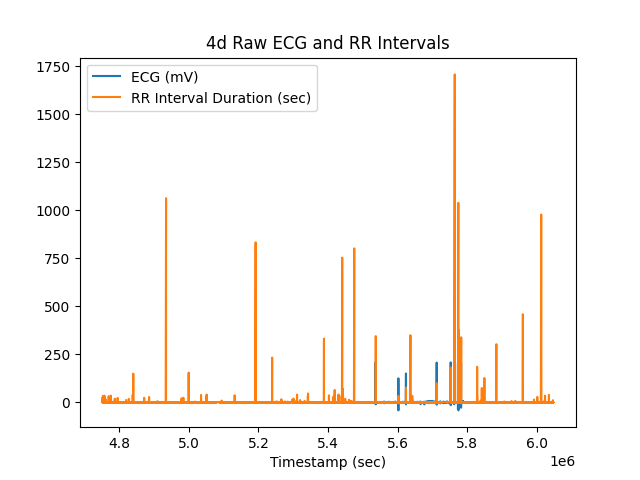

In [9]:
fig = plt.figure()
plt.plot(times, signal)
plt.plot(df_ivl["time"], df_ivl["rrivl"])
plt.title("4d Raw ECG and RR Intervals")
plt.xlabel("Timestamp (sec)")
plt.legend(["ECG (mV)", "RR Interval Duration (sec)"], loc="upper left")
plt.show()

In [5]:
virtual_memory()

svmem(total=12655771648, available=6158548992, percent=51.3, used=6497222656, free=6158548992)